# TELECOM CHURN CASE STUDY

### BUSINESS PROBLEM OVERVIEW


In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

 

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

In this project, you will use the usage-based definition to define churn.

In this project, you will define high-value customers based on a certain metric and predict churn only on high-value customers.

 

 

## We will follow the CRISP-DM FRAMEWORK

##### STEP 1: UNDERSTANDING BUSINESS OBJECTIVE
##### STEP 2:  DATA UNDERSTANDING AND EXPLORATORY DATA ANALYSIS
##### STEP 3:  DATA VISUALIZATION
##### STEP 4:  DATA PREPARATION
##### STEP 5 : MODEL BUILDING AND EVALUATION
##### STEP 6 : INSIGHTS


## STEP 1: UNDERSTANDING BUSINESS OBJECTIVE  

The dataset "telecom_churn_data.csv" contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 


The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.



### Understanding Customer Behaviour During Churn

Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle :

#### The ‘good’ phase:
In this phase, the customer is happy with the service and behaves as usual.

#### The ‘action’ phase: 
The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

#### The ‘churn’ phase:
In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.

In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.



## STEP 2:  DATA UNDERSTANDING AND EXPLORATORY DATA ANALYSIS

####  Importing Libraries

In [1]:
# Ignoring warning messages
import warnings
warnings.filterwarnings('ignore')

# Import the required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

# reading the input data and preview
telecom= pd.read_csv('telecom_churn_data.csv')
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


### Undestanding the data

In [3]:
telecom.shape

(99999, 226)

In [4]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [5]:
telecom.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


### Fixing ROWS and COLUMNS

#### Checking column names for any discrepency

In [6]:
telecom.columns[:41]

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6', 'arpu_7',
       'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7',
       'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2f_mou_9'],
      dtype='object')

In [7]:
telecom.columns[41:81]

Index(['loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8',
       'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
       'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2m_mou_9',
       'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8',
       'std_og_t2f_mou_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7',
       'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'std_og_mou_9', 'isd_og_mou_6', 'isd_og_mou_7',
       'isd_og_mou_8', 'isd_og_mou_9', 'spl_og_mou_6', 'spl_og_mou_7',
       'spl_og_mou_8', 'spl_og_mou_9', 'og_others_6', 'og_others_7',
       'og_others_8', 'og_others_9'],
      dtype='object')

In [8]:
telecom.columns[81:121]

Index(['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'total_og_mou_9',
       'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8',
       'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7',
       'loc_ic_t2m_mou_8', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_6',
       'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_t2f_mou_9',
       'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'loc_ic_mou_9',
       'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8',
       'std_ic_t2t_mou_9', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7',
       'std_ic_t2m_mou_8', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_6',
       'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'std_ic_t2f_mou_9',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8',
       'std_ic_t2o_mou_9', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8',
       'std_ic_mou_9'],
      dtype='object')

In [9]:
telecom.columns[121:161]

Index(['total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_ic_mou_9',
       'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8', 'spl_ic_mou_9',
       'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 'isd_ic_mou_9',
       'ic_others_6', 'ic_others_7', 'ic_others_8', 'ic_others_9',
       'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7',
       'total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9', 'last_day_rch_amt_6', 'last_day_rch_amt_7',
       'last_day_rch_amt_8', 'last_day_rch_amt_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9'],
      dtype='object')

In [10]:
telecom.columns[161:201]

Index(['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'av_rech_amt_data_9', 'vol_2g_mb_6',
       'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_2g_mb_9', 'vol_3g_mb_6',
       'vol_3g_mb_7', 'vol_3g_mb_8', 'vol_3g_mb_9', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'night_pck_user_9'],
      dtype='object')

In [11]:
telecom.columns[201:241]

Index(['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_2g_9',
       'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'sachet_2g_9',
       'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'monthly_3g_9',
       'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'sachet_3g_9', 'fb_user_6',
       'fb_user_7', 'fb_user_8', 'fb_user_9', 'aon', 'aug_vbc_3g',
       'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object')

#### Column name to be changed for  aug_vbc_3g',   'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'

In [12]:
#REnaming columns with sufix _6,_7,_8,_9
telecom.rename(columns={"aug_vbc_3g": "vbc_3g_8","jul_vbc_3g":"vbc_3g_7", "jun_vbc_3g":"vbc_3g_6",
                        "sep_vbc_3g":"vbc_3g_9"},inplace=True)

#### Changing columns datatype to DATETIME

In [13]:
#filtering columns with 'date'
cols_date=telecom.filter(regex='date').columns
cols_date

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9'],
      dtype='object')

In [14]:
#Datatype conversion to datetime
for col in cols_date:
      telecom[col]=pd.to_datetime(telecom[col])

#### Filtering columns with 'rech'

In [15]:
#filtering columns with 'rech'
cols=telecom.columns
cols_rech=[i for i in cols if 'rech' in i]
print(cols_rech)

['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']


### DERIVED METRICS-total_amt_6 and total_amt_7,avg_amt_goodph

#### Total recharge value for 6th month  is total_rech_amt_6 + total_rech_amt_data_6(total_rech_data_6*av_rech_amt_data_6) + vbc_3g_6

In [16]:
telecom[['total_rech_num_6','total_rech_amt_6','max_rech_amt_6','total_rech_data_6','count_rech_2g_6',
         'count_rech_3g_6','max_rech_data_6','av_rech_amt_data_6','vbc_3g_6']].head()

,total_rech_num_6,total_rech_amt_6,max_rech_amt_6,total_rech_data_6,count_rech_2g_6,count_rech_3g_6,max_rech_data_6,av_rech_amt_data_6,vbc_3g_6
0,4,362,252,1.0,0.0,1.0,252.0,252.0,101.20
1,4,74,44,NaN,NaN,NaN,NaN,NaN,0.00
2,5,168,86,NaN,NaN,NaN,NaN,NaN,4.17
3,10,230,60,NaN,NaN,NaN,NaN,NaN,0.00
4,5,196,56,1.0,1.0,0.0,56.0,56.0,0.00


In [17]:
#Total recharge amount for 6th month

telecom['total_amt_6']=telecom['total_rech_amt_6'].fillna(0) + telecom['total_rech_data_6'].fillna(0)*telecom['av_rech_amt_data_6'].fillna(0)
+ telecom['vbc_3g_6'].fillna(0)

telecom[['total_amt_6','total_rech_amt_6','total_rech_data_6','av_rech_amt_data_6','vbc_3g_6']].head()



,total_amt_6,total_rech_amt_6,total_rech_data_6,av_rech_amt_data_6,vbc_3g_6
0,614.0,362,1.0,252.0,101.20
1,74.0,74,NaN,NaN,0.00
2,168.0,168,NaN,NaN,4.17
3,230.0,230,NaN,NaN,0.00
4,252.0,196,1.0,56.0,0.00


#### Total recharge value for 7th month  is total_rech_amt_7 + total_rech_amt_data_7(total_rech_data_7*av_rech_amt_data_7) + vbc_3g_7

In [18]:
telecom[['total_rech_num_7','total_rech_amt_7','max_rech_amt_7','total_rech_data_7','count_rech_2g_7',
         'count_rech_3g_7','max_rech_data_7','av_rech_amt_data_7','vbc_3g_7']].head()
                                                                                   

,total_rech_num_7,total_rech_amt_7,max_rech_amt_7,total_rech_data_7,count_rech_2g_7,count_rech_3g_7,max_rech_data_7,av_rech_amt_data_7,vbc_3g_7
0,3,252,252,1.0,0.0,1.0,252.0,252.0,0.0
1,9,384,154,1.0,1.0,0.0,154.0,154.0,0.0
2,4,315,200,NaN,NaN,NaN,NaN,NaN,0.0
3,11,310,50,NaN,NaN,NaN,NaN,NaN,0.0
4,6,350,110,NaN,NaN,NaN,NaN,NaN,0.0


In [19]:
#Total recharge amount for 7th month

telecom['total_amt_7']=telecom['total_rech_amt_7'].fillna(0) + telecom['total_rech_data_7'].fillna(0)*telecom['av_rech_amt_data_7'].fillna(0)
+ telecom['vbc_3g_7'].fillna(0)

telecom[['total_amt_7','total_rech_amt_7','total_rech_data_7','av_rech_amt_data_7','vbc_3g_7']].head()


,total_amt_7,total_rech_amt_7,total_rech_data_7,av_rech_amt_data_7,vbc_3g_7
0,504.0,252,1.0,252.0,0.0
1,538.0,384,1.0,154.0,0.0
2,315.0,315,NaN,NaN,0.0
3,310.0,310,NaN,NaN,0.0
4,350.0,350,NaN,NaN,0.0


####  Finding Average Recharge amount for goodphase ie. 6th and 7th months

In [20]:
# Finding average recharge amount for 6th and 7th month ie good phase

telecom['avg_amt_goodph']=telecom['total_amt_6'].fillna(0)/2 +telecom['total_amt_7'].fillna(0) /2
telecom[['avg_amt_goodph','total_amt_6','total_amt_7']].head()


,avg_amt_goodph,total_amt_6,total_amt_7
0,559.0,614.0,504.0
1,306.0,74.0,538.0
2,241.5,168.0,315.0
3,270.0,230.0,310.0
4,301.0,252.0,350.0


In [21]:
#Deleting total_amt_6 and total_amt_7 to reduce redundancy

telecom.drop(['total_amt_6','total_amt_7'],axis=1,inplace=True)

### Filtering High Value customers

Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

#### Filtering high value customers based on 70 percentile value of average goodphase recharge amount

In [22]:
perc_70=telecom['avg_amt_goodph'].quantile(0.7)
perc_70

478.0

In [23]:
df_highvalue_cust= telecom[telecom['avg_amt_goodph']>= perc_70]

In [24]:
df_highvalue_cust.shape

(30001, 227)

In [25]:
#Taking a back up of filtered data
data_backup=df_highvalue_cust.copy()

In [26]:
data_backup.shape

(30001, 227)

### DATA CLEANING

##### Finding columns with only one unique values

In [27]:
col_single_value= [col for col in df_highvalue_cust.columns if df_highvalue_cust[col].nunique()==1]
col_single_value

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_9',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'std_ic_t2o_mou_9']

In [28]:
#Finding out  columns with only one unique value
for i in col_single_value:
    print(df_highvalue_cust[i] .value_counts() , df_highvalue_cust[i] .isna().sum())       
     

109    30001
Name: circle_id, dtype: int64 0
0.0    29777
Name: loc_og_t2o_mou, dtype: int64 224
0.0    29777
Name: std_og_t2o_mou, dtype: int64 224
0.0    29777
Name: loc_ic_t2o_mou, dtype: int64 224
2014-06-30    30001
Name: last_date_of_month_6, dtype: int64 0
2014-07-31    29974
Name: last_date_of_month_7, dtype: int64 27
2014-08-31    29836
Name: last_date_of_month_8, dtype: int64 165
2014-09-30    29636
Name: last_date_of_month_9, dtype: int64 365
0.0    29456
Name: std_og_t2c_mou_6, dtype: int64 545
0.0    29464
Name: std_og_t2c_mou_7, dtype: int64 537
0.0    28827
Name: std_og_t2c_mou_8, dtype: int64 1174
0.0    28100
Name: std_og_t2c_mou_9, dtype: int64 1901
0.0    29456
Name: std_ic_t2o_mou_6, dtype: int64 545
0.0    29464
Name: std_ic_t2o_mou_7, dtype: int64 537
0.0    28827
Name: std_ic_t2o_mou_8, dtype: int64 1174
0.0    28100
Name: std_ic_t2o_mou_9, dtype: int64 1901


In [29]:
#Dropping columns with only single value as they dont add any information
df_highvalue_cust.drop(col_single_value,axis=1,inplace=True)

##### Finding columns with binary values

In [30]:
#Finding columns with only 2 values
col_binary_value= [col for col in df_highvalue_cust.columns if df_highvalue_cust[col].nunique()==2]
col_binary_value

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9']

In [31]:
#Finding out  columns with only two unique value
for i in col_binary_value:
    print(df_highvalue_cust[i] .value_counts() , df_highvalue_cust[i] .isna().sum())       


0.0    16349
1.0      407
Name: night_pck_user_6, dtype: int64 13245
0.0    16682
1.0      375
Name: night_pck_user_7, dtype: int64 12944
0.0    15612
1.0      341
Name: night_pck_user_8, dtype: int64 14048
0.0    14952
1.0      268
Name: night_pck_user_9, dtype: int64 14781
1.0    15525
0.0     1231
Name: fb_user_6, dtype: int64 13245
1.0    15722
0.0     1335
Name: fb_user_7, dtype: int64 12944
1.0    14313
0.0     1640
Name: fb_user_8, dtype: int64 14048
1.0    13564
0.0     1656
Name: fb_user_9, dtype: int64 14781


##### Imputing null values for binary value columns

In [32]:
#Replacing binary value columns nan with mode value
for i in col_binary_value:
    df_highvalue_cust[i].replace(np.nan,df_highvalue_cust[i].mode()[0],inplace=True)

In [33]:
#Finding out  columns with only two unique value
for i in col_binary_value:
    print(df_highvalue_cust[i] .value_counts() , df_highvalue_cust[i] .isna().sum())       


0.0    29594
1.0      407
Name: night_pck_user_6, dtype: int64 0
0.0    29626
1.0      375
Name: night_pck_user_7, dtype: int64 0
0.0    29660
1.0      341
Name: night_pck_user_8, dtype: int64 0
0.0    29733
1.0      268
Name: night_pck_user_9, dtype: int64 0
1.0    28770
0.0     1231
Name: fb_user_6, dtype: int64 0
1.0    28666
0.0     1335
Name: fb_user_7, dtype: int64 0
1.0    28361
0.0     1640
Name: fb_user_8, dtype: int64 0
1.0    28345
0.0     1656
Name: fb_user_9, dtype: int64 0


### Removing and aggregating columns in Good phase

In [34]:
#Getting numeric columns
numeric_col=df_highvalue_cust.select_dtypes(include=np.number)


In [35]:
#Geting numeric columns with suffix 6 n 7
numeric_attrib_gd=list(set(numeric_col.filter(regex='_6|_7').columns.str[:-2]))
# fb_user and night_pck_user coukd be removed as they have to be added logically
numeric_attrib_gd.remove('fb_user')
numeric_attrib_gd.remove('night_pck_user')


#### Aggregating values for numeric columns

In [36]:
for  col in numeric_attrib_gd:
       
    avg_col_name = "avg_"+col+"_gd"
    col_6 = col+"_6"
    col_7 = col+"_7"
    df_highvalue_cust[avg_col_name] = (df_highvalue_cust[col_6].fillna(0)  + df_highvalue_cust[col_7].fillna(0) )/ 2


### Logical aggregation for fb_user and night_pck_user for good phase

In [37]:
df_highvalue_cust['avg_fb_user_gd']= np.where(df_highvalue_cust[['fb_user_6','fb_user_7']].sum(axis=1)==0,0,1)
df_highvalue_cust['avg_night_pck_user_gd']= np.where(df_highvalue_cust[['night_pck_user_6','night_pck_user_7']].sum(axis=1)==0,0,1)

In [38]:
df_highvalue_cust['avg_night_pck_user_gd'].value_counts()

0    29411
1      590
Name: avg_night_pck_user_gd, dtype: int64

In [39]:
df_highvalue_cust['avg_fb_user_gd'].value_counts()

1    29308
0      693
Name: avg_fb_user_gd, dtype: int64

In [40]:
#Getting numeric columns which were aggregated in 6 n 7
numeric_attrib_gd=numeric_col.filter(regex='_6|_7').columns
## Removing individual columns for 6 n 7 after aggregating
df_highvalue_cust.drop(numeric_attrib_gd,axis=1,inplace=True)

In [41]:
df_highvalue_cust.shape

(30001, 161)

### Finding columns with  missing value more than threshold

In [42]:
def get_missing_value(data, threshold):
     for i in data.columns:
        if data[i].isnull().mean()*100 >=threshold:
           print(i ,  data[i] .isnull().mean()*100, data[i] .isnull().sum())


In [43]:
get_missing_value(df_highvalue_cust,30)

date_of_last_rech_data_6 44.148528382387255 13245
date_of_last_rech_data_7 43.14522849238359 12944
date_of_last_rech_data_8 46.82510582980567 14048
date_of_last_rech_data_9 49.26835772140928 14781
total_rech_data_8 46.82510582980567 14048
total_rech_data_9 49.26835772140928 14781
max_rech_data_8 46.82510582980567 14048
max_rech_data_9 49.26835772140928 14781
count_rech_2g_8 46.82510582980567 14048
count_rech_2g_9 49.26835772140928 14781
count_rech_3g_8 46.82510582980567 14048
count_rech_3g_9 49.26835772140928 14781
av_rech_amt_data_8 46.82510582980567 14048
av_rech_amt_data_9 49.26835772140928 14781
arpu_3g_8 46.82510582980567 14048
arpu_3g_9 49.26835772140928 14781
arpu_2g_8 46.82510582980567 14048
arpu_2g_9 49.26835772140928 14781


##### Imputing null in  rech related columns with zero

In [44]:
impute_feature_list=['total_rech_data_','max_rech_data_','count_rech_2g_','count_rech_3g_',
                     'av_rech_amt_data_','arpu_3g_','arpu_2g_']
to_impute_col_list=[i + s for s in ['8','9'] for i in impute_feature_list]
to_impute_col_list

['total_rech_data_8',
 'max_rech_data_8',
 'count_rech_2g_8',
 'count_rech_3g_8',
 'av_rech_amt_data_8',
 'arpu_3g_8',
 'arpu_2g_8',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'arpu_3g_9',
 'arpu_2g_9']

In [45]:
df_highvalue_cust[to_impute_col_list]=df_highvalue_cust[to_impute_col_list].replace(np.nan,0)

In [46]:
df_highvalue_cust[to_impute_col_list].isna().mean()

total_rech_data_8     0.0
max_rech_data_8       0.0
count_rech_2g_8       0.0
count_rech_3g_8       0.0
av_rech_amt_data_8    0.0
arpu_3g_8             0.0
arpu_2g_8             0.0
total_rech_data_9     0.0
max_rech_data_9       0.0
count_rech_2g_9       0.0
count_rech_3g_9       0.0
av_rech_amt_data_9    0.0
arpu_3g_9             0.0
arpu_2g_9             0.0
dtype: float64

##### DERIVED METRICS- monthhalf from date


Extracting whether recharge done on first half or second half  of each month(before or after 15th of teh month)
f

In [47]:
cols_date=df_highvalue_cust.filter(regex='date').columns
cols_date

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9'],
      dtype='object')

In [48]:
df_highvalue_cust[cols_date].isnull().mean()

date_of_last_rech_6         0.002433
date_of_last_rech_7         0.003267
date_of_last_rech_8         0.019433
date_of_last_rech_9         0.027166
date_of_last_rech_data_6    0.441485
date_of_last_rech_data_7    0.431452
date_of_last_rech_data_8    0.468251
date_of_last_rech_data_9    0.492684
dtype: float64

In [49]:
# Extracting whether recharge done on first half or second half  of each month(before or after 15th of teh month)
for col in cols_date:
    col_monthhalf=col.replace('date','monthhalf')
    df_highvalue_cust[col_monthhalf]=df_highvalue_cust[col].map(lambda x: 1 if x.day > 15 else 0)


In [50]:
col_monthhalf=df_highvalue_cust.filter(regex='monthhalf').columns
col_monthhalf

Index(['monthhalf_of_last_rech_6', 'monthhalf_of_last_rech_7',
       'monthhalf_of_last_rech_8', 'monthhalf_of_last_rech_9',
       'monthhalf_of_last_rech_data_6', 'monthhalf_of_last_rech_data_7',
       'monthhalf_of_last_rech_data_8', 'monthhalf_of_last_rech_data_9'],
      dtype='object')

In [51]:
df_highvalue_cust[col_monthhalf].describe()

,monthhalf_of_last_rech_6,monthhalf_of_last_rech_7,monthhalf_of_last_rech_8,monthhalf_of_last_rech_9,monthhalf_of_last_rech_data_6,monthhalf_of_last_rech_data_7,monthhalf_of_last_rech_data_8,monthhalf_of_last_rech_data_9
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,0.947568,0.960101,0.928002,0.930402,0.398420,0.416019,0.369654,0.348822
std,0.222899,0.195724,0.258488,0.254472,0.489581,0.492905,0.482719,0.476605
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
for col in col_monthhalf:
     print(df_highvalue_cust[col].value_counts())

1    28428
0     1573
Name: monthhalf_of_last_rech_6, dtype: int64
1    28804
0     1197
Name: monthhalf_of_last_rech_7, dtype: int64
1    27841
0     2160
Name: monthhalf_of_last_rech_8, dtype: int64
1    27913
0     2088
Name: monthhalf_of_last_rech_9, dtype: int64
0    18048
1    11953
Name: monthhalf_of_last_rech_data_6, dtype: int64
0    17520
1    12481
Name: monthhalf_of_last_rech_data_7, dtype: int64
0    18911
1    11090
Name: monthhalf_of_last_rech_data_8, dtype: int64
0    19536
1    10465
Name: monthhalf_of_last_rech_data_9, dtype: int64


In [53]:
df_highvalue_cust.shape

(30001, 169)

#### Dropping date columns after extracting day to avoid redundancy

In [54]:
df_highvalue_cust.drop(cols_date,axis=1,inplace=True)

In [55]:
df_highvalue_cust.shape

(30001, 161)

In [56]:
get_missing_value(df_highvalue_cust,1)

onnet_mou_8 3.9132028932368925 1174
onnet_mou_9 6.33645545148495 1901
offnet_mou_8 3.9132028932368925 1174
offnet_mou_9 6.33645545148495 1901
roam_ic_mou_8 3.9132028932368925 1174
roam_ic_mou_9 6.33645545148495 1901
roam_og_mou_8 3.9132028932368925 1174
roam_og_mou_9 6.33645545148495 1901
loc_og_t2t_mou_8 3.9132028932368925 1174
loc_og_t2t_mou_9 6.33645545148495 1901
loc_og_t2m_mou_8 3.9132028932368925 1174
loc_og_t2m_mou_9 6.33645545148495 1901
loc_og_t2f_mou_8 3.9132028932368925 1174
loc_og_t2f_mou_9 6.33645545148495 1901
loc_og_t2c_mou_8 3.9132028932368925 1174
loc_og_t2c_mou_9 6.33645545148495 1901
loc_og_mou_8 3.9132028932368925 1174
loc_og_mou_9 6.33645545148495 1901
std_og_t2t_mou_8 3.9132028932368925 1174
std_og_t2t_mou_9 6.33645545148495 1901
std_og_t2m_mou_8 3.9132028932368925 1174
std_og_t2m_mou_9 6.33645545148495 1901
std_og_t2f_mou_8 3.9132028932368925 1174
std_og_t2f_mou_9 6.33645545148495 1901
std_og_mou_8 3.9132028932368925 1174
std_og_mou_9 6.33645545148495 1901
isd_og

### TAG CHURNERS


Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: 

Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes we need to use to tag churners are:

##### total_ic_mou_9

##### total_og_mou_9

##### vol_2g_mb_9

##### vol_3g_mb_9





In [57]:
churn_features=['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']
df_highvalue_cust[churn_features].describe()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
count,30001.000000,30001.000000,30001.000000,30001.000000
mean,264.901497,500.869219,91.435910,349.513848
std,358.290694,666.902007,282.370006,947.079372
min,0.000000,0.000000,0.000000,0.000000
25%,50.480000,47.640000,0.000000,0.000000
50%,157.980000,284.940000,0.000000,0.000000
75%,343.540000,698.680000,38.000000,320.610000
max,7785.730000,11517.730000,8993.950000,39221.270000


In [58]:
df_highvalue_cust[churn_features].isnull().mean()

total_ic_mou_9    0.0
total_og_mou_9    0.0
vol_2g_mb_9       0.0
vol_3g_mb_9       0.0
dtype: float64

In [59]:
#Churn =1 for no calls and no data elde churn=0

df_highvalue_cust['churn'] =np.where(df_highvalue_cust[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9',
                                                        'vol_3g_mb_9']].sum(axis=1) == 0,1,0)

In [60]:
df_highvalue_cust['churn'].sum()

2441

In [61]:
df_highvalue_cust['churn'].value_counts()

0    27560
1     2441
Name: churn, dtype: int64

In [62]:
churnrate= df_highvalue_cust['churn'].sum()/ len(df_highvalue_cust['churn']) *100
print("Churn rate is " + str(churnrate) +"%")

Churn rate is 8.136395453484884%


##### Remove attributes of the churn phase

In [63]:
#Getting attributes for 9th month
col_list_9 = df_highvalue_cust.filter(regex='_9').columns
col_list_9


Index(['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9',
       'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9',
       'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9',
       'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9',
       'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9',
       'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9',
       'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9',
       'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9',
       'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9',
       'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9',
       'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9',
       'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9',
       'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9',
       'sachet_3g_9', 'fb_user_9', 'vbc_3g_9', 'monthhalf_of_last_rech

In [64]:
#Dropping attributes of churn phase
df_highvalue_cust.drop(col_list_9,axis=1,inplace=True)

In [65]:
df_highvalue_cust.shape

(30001, 110)

In [66]:
get_missing_value(df_highvalue_cust,0.1)

onnet_mou_8 3.9132028932368925 1174
offnet_mou_8 3.9132028932368925 1174
roam_ic_mou_8 3.9132028932368925 1174
roam_og_mou_8 3.9132028932368925 1174
loc_og_t2t_mou_8 3.9132028932368925 1174
loc_og_t2m_mou_8 3.9132028932368925 1174
loc_og_t2f_mou_8 3.9132028932368925 1174
loc_og_t2c_mou_8 3.9132028932368925 1174
loc_og_mou_8 3.9132028932368925 1174
std_og_t2t_mou_8 3.9132028932368925 1174
std_og_t2m_mou_8 3.9132028932368925 1174
std_og_t2f_mou_8 3.9132028932368925 1174
std_og_mou_8 3.9132028932368925 1174
isd_og_mou_8 3.9132028932368925 1174
spl_og_mou_8 3.9132028932368925 1174
og_others_8 3.9132028932368925 1174
loc_ic_t2t_mou_8 3.9132028932368925 1174
loc_ic_t2m_mou_8 3.9132028932368925 1174
loc_ic_t2f_mou_8 3.9132028932368925 1174
loc_ic_mou_8 3.9132028932368925 1174
std_ic_t2t_mou_8 3.9132028932368925 1174
std_ic_t2m_mou_8 3.9132028932368925 1174
std_ic_t2f_mou_8 3.9132028932368925 1174
std_ic_mou_8 3.9132028932368925 1174
spl_ic_mou_8 3.9132028932368925 1174
isd_ic_mou_8 3.91320289

### Imputing rest of the null values with zero 

In [67]:
df_highvalue_cust = df_highvalue_cust.fillna(0)


In [68]:
df_highvalue_cust.shape

(30001, 110)

In [69]:
df_highvalue_cust.isnull().any().sum()

0

In [70]:
#Resetting the index
df_highvalue_cust.reset_index(inplace= True,drop=True)

In [71]:
df_highvalue_cust.head()

,mobile_number,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,...,avg_loc_og_t2f_mou_gd,avg_fb_user_gd,avg_night_pck_user_gd,monthhalf_of_last_rech_6,monthhalf_of_last_rech_7,monthhalf_of_last_rech_8,monthhalf_of_last_rech_data_6,monthhalf_of_last_rech_data_7,monthhalf_of_last_rech_data_8,churn
0,7000842753,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,1,0,1,1,0,1,1,0,1
1,7000701601,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,...,58.635,1,0,1,1,1,0,0,0,1
2,7001524846,137.362,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,...,0.000,1,0,1,1,1,0,1,1,0
3,7002124215,637.760,85.14,983.39,0.00,0.00,23.34,104.81,1.58,0.00,...,0.375,1,0,1,1,1,0,0,0,0
4,7000887461,366.966,33.58,205.89,0.00,0.00,33.58,148.56,0.00,17.71,...,0.000,1,0,1,0,1,0,0,0,0


### OUTLIER TREATMENT

In [72]:
df_highvalue_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Columns: 110 entries, mobile_number to churn
dtypes: float64(91), int32(3), int64(16)
memory usage: 24.8 MB


In [73]:
#Getting numeric columns with int64
int64_col=df_highvalue_cust.select_dtypes('int64')
int64_col.quantile([0.1,0.25,0.5,0.9,0.99,1])

,mobile_number,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,monthhalf_of_last_rech_6,monthhalf_of_last_rech_7,monthhalf_of_last_rech_8,monthhalf_of_last_rech_data_6,monthhalf_of_last_rech_data_7,monthhalf_of_last_rech_data_8
0.10,7.000251e+09,2.0,56.0,25.0,0.0,0.0,0.0,0.0,0.0,284.0,1.0,1.0,1.0,0.0,0.0,0.0
0.25,7.000609e+09,4.0,250.0,50.0,0.0,0.0,0.0,0.0,0.0,460.0,1.0,1.0,1.0,0.0,0.0,0.0
0.50,7.001203e+09,8.0,490.0,130.0,50.0,0.0,0.0,0.0,0.0,846.0,1.0,1.0,1.0,0.0,0.0,0.0
0.90,7.002165e+09,21.0,1148.0,252.0,225.0,1.0,4.0,1.0,0.0,2793.0,1.0,1.0,1.0,1.0,1.0,1.0
0.99,7.002386e+09,45.0,2341.0,951.0,565.0,2.0,12.0,3.0,4.0,3651.0,1.0,1.0,1.0,1.0,1.0,1.0
1.00,7.002411e+09,196.0,45320.0,4449.0,4449.0,5.0,44.0,16.0,41.0,4321.0,1.0,1.0,1.0,1.0,1.0,1.0


In [74]:
#NUmber of value above 99 percentile
for i  in int64_col.columns:
     count_outliers=int64_col[int64_col[i] > np.percentile(int64_col[i],99)].shape[0]
     print("Count of values above 99 percentile for " + str(i) + " is " +str( count_outliers))

Count of values above 99 percentile for mobile_number is 300
Count of values above 99 percentile for total_rech_num_8 is 277
Count of values above 99 percentile for total_rech_amt_8 is 300
Count of values above 99 percentile for max_rech_amt_8 is 286
Count of values above 99 percentile for last_day_rch_amt_8 is 296
Count of values above 99 percentile for monthly_2g_8 is 40
Count of values above 99 percentile for sachet_2g_8 is 240
Count of values above 99 percentile for monthly_3g_8 is 155
Count of values above 99 percentile for sachet_3g_8 is 297
Count of values above 99 percentile for aon is 68
Count of values above 99 percentile for monthhalf_of_last_rech_6 is 0
Count of values above 99 percentile for monthhalf_of_last_rech_7 is 0
Count of values above 99 percentile for monthhalf_of_last_rech_8 is 0
Count of values above 99 percentile for monthhalf_of_last_rech_data_6 is 0
Count of values above 99 percentile for monthhalf_of_last_rech_data_7 is 0
Count of values above 99 percentile 

In [75]:
#Getting numeric columns for float64
float64_df=df_highvalue_cust.select_dtypes('float64')
float64_col=float64_df.columns
float64_df.quantile([0.1,0.25,0.5,0.9,0.99,1])

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,...,avg_loc_og_t2c_mou_gd,avg_monthly_3g_gd,avg_std_ic_t2t_mou_gd,avg_std_ic_t2f_mou_gd,avg_last_day_rch_amt_gd,avg_std_og_mou_gd,avg_total_rech_data_gd,avg_ic_others_gd,avg_vbc_3g_gd,avg_loc_og_t2f_mou_gd
0.10,84.000,0.00,2.20,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.0,0.000,0.000,15.0,0.000,0.0,0.00,0.000,0.00
0.25,231.473,10.39,46.74,0.00,0.00,2.53,13.09,0.00,0.00,22.46,...,0.000,0.0,0.000,0.000,30.0,1.840,0.0,0.00,0.000,0.00
0.50,427.585,65.61,182.79,0.00,0.00,20.73,67.76,0.00,0.00,110.81,...,0.000,0.0,1.405,0.000,77.0,58.220,1.0,0.00,0.000,0.64
0.90,977.345,665.08,823.68,15.01,28.88,178.84,398.51,15.16,4.58,607.83,...,4.765,1.0,31.780,4.780,200.0,1093.610,5.0,1.75,559.985,16.00
0.99,1986.622,2159.11,2193.13,282.19,427.03,913.33,1088.31,82.24,28.21,1662.81,...,22.190,2.5,200.035,46.470,550.0,2584.240,12.0,19.53,1835.590,86.31
1.00,33543.624,10752.56,14007.34,4169.81,5337.04,10752.56,4961.33,928.49,351.83,11039.91,...,420.575,11.5,5630.245,1185.045,3100.0,8856.235,54.5,1420.04,8190.585,1331.23


In [76]:
#NUmber of value above 99 percentile
for i  in float64_col:
     count_outliers=float64_df[float64_df[i] > np.percentile(float64_df[i],99)].shape[0]
     print("Count of values above 99 percentile for " + str(i) + " is " +str( count_outliers))

Count of values above 99 percentile for arpu_8 is 300
Count of values above 99 percentile for onnet_mou_8 is 300
Count of values above 99 percentile for offnet_mou_8 is 300
Count of values above 99 percentile for roam_ic_mou_8 is 300
Count of values above 99 percentile for roam_og_mou_8 is 300
Count of values above 99 percentile for loc_og_t2t_mou_8 is 300
Count of values above 99 percentile for loc_og_t2m_mou_8 is 300
Count of values above 99 percentile for loc_og_t2f_mou_8 is 300
Count of values above 99 percentile for loc_og_t2c_mou_8 is 300
Count of values above 99 percentile for loc_og_mou_8 is 300
Count of values above 99 percentile for std_og_t2t_mou_8 is 300
Count of values above 99 percentile for std_og_t2m_mou_8 is 300
Count of values above 99 percentile for std_og_t2f_mou_8 is 300
Count of values above 99 percentile for std_og_mou_8 is 300
Count of values above 99 percentile for isd_og_mou_8 is 300
Count of values above 99 percentile for spl_og_mou_8 is 300
Count of values a

Count of values above 99 percentile is 300


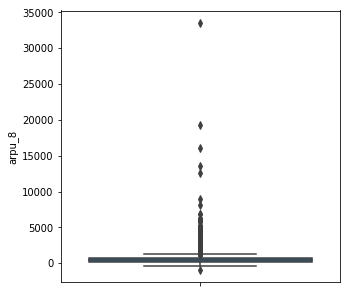

In [77]:
#BOX PLOT for arpu_8
plt.figure(figsize=(5,5))
sns.boxplot(y='arpu_8',data=df_highvalue_cust)
count_outliers=df_highvalue_cust[df_highvalue_cust.arpu_8 > np.percentile(df_highvalue_cust.arpu_8,99)].shape[0]
print("Count of values above 99 percentile is " +str( count_outliers))

Count of values above 99 percentile is 300


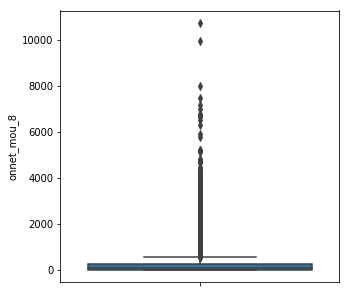

In [78]:
#BOX PLOT for onnet_mou_8
plt.figure(figsize=(5,5))
sns.boxplot(y='onnet_mou_8',data=df_highvalue_cust)
count_outliers=df_highvalue_cust[df_highvalue_cust.onnet_mou_8 > np.percentile(df_highvalue_cust.onnet_mou_8,99)].shape[0]
print("Count of values above 99 percentile is " +str( count_outliers))

Count of values above 99 percentile is 300


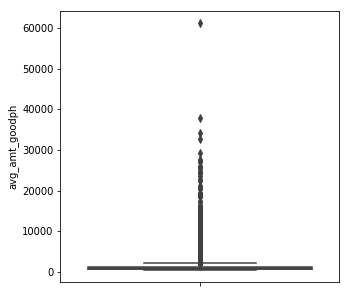

In [79]:
#BOX PLOT for avg_amt_goodph 
plt.figure(figsize=(5,5))
sns.boxplot(y='avg_amt_goodph',data=df_highvalue_cust)
count_outliers=df_highvalue_cust[df_highvalue_cust.avg_amt_goodph  > np.percentile(df_highvalue_cust.avg_amt_goodph ,99)].shape[0]
print("Count of values above 99 percentile is " +str( count_outliers))

##### A reasonable amount of values (ie. around 300 ) are above 99 percentile for most of the columns.
##### Hence they could not be considered as outliers 

###  Binning the AGE ON NETWORK (AON)as years for variant analysis

In [80]:
df_highvalue_cust['aon'].describe()

count    30001.000000
mean      1209.368754
std        957.677989
min        180.000000
25%        460.000000
50%        846.000000
75%       1756.000000
max       4321.000000
Name: aon, dtype: float64

In [81]:
df_highvalue_cust['aon_yrs']=df_highvalue_cust['aon']/365

In [82]:
df_highvalue_cust['aon_yrs'].describe()

count    30001.000000
mean         3.313339
std          2.623775
min          0.493151
25%          1.260274
50%          2.317808
75%          4.810959
max         11.838356
Name: aon_yrs, dtype: float64

In [83]:
#Binning the aon as years
bins = [0,2,5,10,20]
aon_bin=['0-2','2-5','5-10','10+']
df_highvalue_cust['aon_Range'] = pd.cut(df_highvalue_cust['aon_yrs'],bins,right=False,labels=aon_bin)
df_highvalue_cust['aon_Range'].value_counts()


0-2     13247
2-5      9550
5-10     6676
10+       528
Name: aon_Range, dtype: int64

## STEP 3:  DATA VISUALIZATION

####  VARIANT ANALYSIS


In [84]:
df_highvalue_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Columns: 112 entries, mobile_number to aon_Range
dtypes: category(1), float64(92), int32(3), int64(16)
memory usage: 25.1 MB


In [85]:
df_highvalue_cust.columns

Index(['mobile_number', 'arpu_8', 'onnet_mou_8', 'offnet_mou_8',
       'roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8',
       ...
       'avg_night_pck_user_gd', 'monthhalf_of_last_rech_6',
       'monthhalf_of_last_rech_7', 'monthhalf_of_last_rech_8',
       'monthhalf_of_last_rech_data_6', 'monthhalf_of_last_rech_data_7',
       'monthhalf_of_last_rech_data_8', 'churn', 'aon_yrs', 'aon_Range'],
      dtype='object', length=112)

### AON 

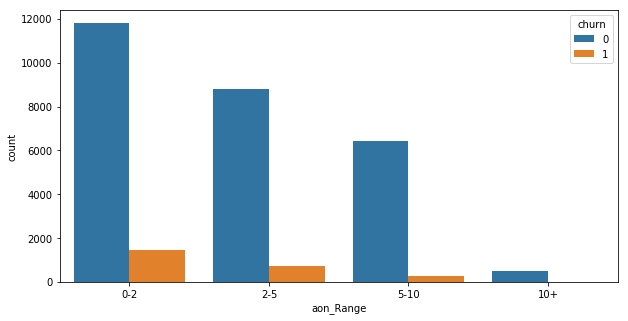

In [86]:
plt.figure(figsize=(10,5))
sns.countplot(x='aon_Range',data=df_highvalue_cust,hue='churn')


#### More than 10 years on network are the most loyal customers with least churn

#### Feature wise countplot

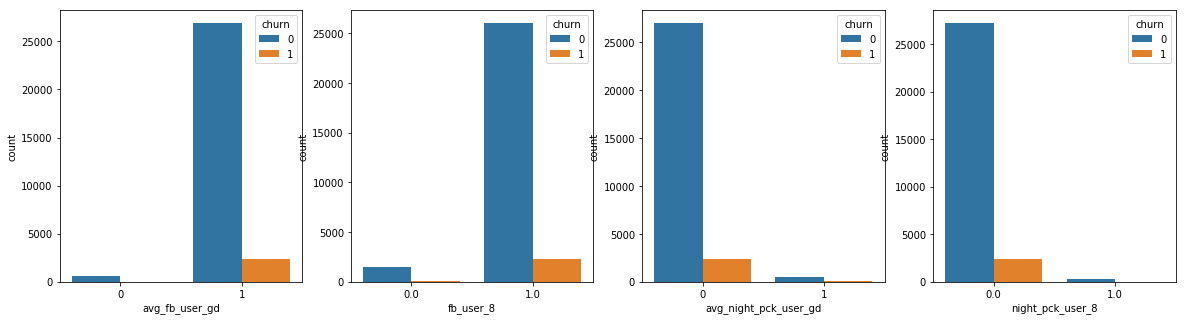

In [87]:
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
sns.countplot(x='avg_fb_user_gd',data=df_highvalue_cust,hue='churn')
plt.subplot(1,4,2)
sns.countplot(x='fb_user_8',data=df_highvalue_cust,hue='churn')
plt.subplot(1,4,3)
sns.countplot(x='avg_night_pck_user_gd',data=df_highvalue_cust,hue='churn')
plt.subplot(1,4,4)
sns.countplot(x='night_pck_user_8',data=df_highvalue_cust,hue='churn')


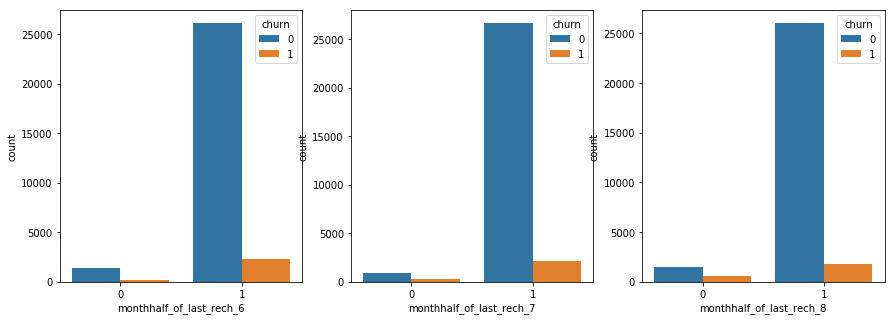

In [88]:
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
sns.countplot(x='monthhalf_of_last_rech_6',data=df_highvalue_cust,hue='churn')
plt.subplot(1,4,2)
sns.countplot(x='monthhalf_of_last_rech_7',data=df_highvalue_cust,hue='churn')
plt.subplot(1,4,3)
sns.countplot(x='monthhalf_of_last_rech_8',data=df_highvalue_cust,hue='churn')


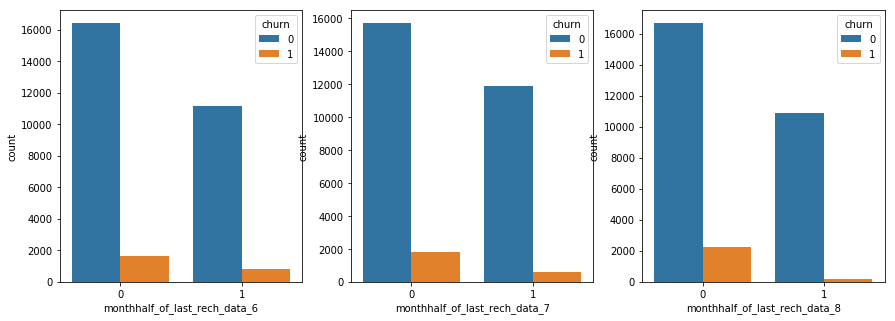

In [89]:
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
sns.countplot(x='monthhalf_of_last_rech_data_6',data=df_highvalue_cust,hue='churn')
plt.subplot(1,4,2)
sns.countplot(x='monthhalf_of_last_rech_data_7',data=df_highvalue_cust,hue='churn')
plt.subplot(1,4,3)
sns.countplot(x='monthhalf_of_last_rech_data_8',data=df_highvalue_cust,hue='churn')


##### The voice recharge is majorly done during the first half of the month
##### The data recharge is majorly done during the second half of the month

### PAIR-PLOTS

In [90]:
#filtering columns with 'rech'
cols=df_highvalue_cust.columns
cols_rech=[i for i in cols if 'rech' in i]
print(cols_rech)

['total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8', 'total_rech_data_8', 'max_rech_data_8', 'count_rech_2g_8', 'count_rech_3g_8', 'av_rech_amt_data_8', 'avg_total_rech_amt_gd', 'avg_count_rech_3g_gd', 'avg_count_rech_2g_gd', 'avg_total_rech_num_gd', 'avg_max_rech_amt_gd', 'avg_max_rech_data_gd', 'avg_av_rech_amt_data_gd', 'avg_total_rech_data_gd', 'monthhalf_of_last_rech_6', 'monthhalf_of_last_rech_7', 'monthhalf_of_last_rech_8', 'monthhalf_of_last_rech_data_6', 'monthhalf_of_last_rech_data_7', 'monthhalf_of_last_rech_data_8']


In [91]:
rech_gd_list=[i for i in cols_rech if '_gd' in i]
rech_8_list=[i for i in cols_rech if '_8' in i]

#### Pairplot for recharge parameters of good phase

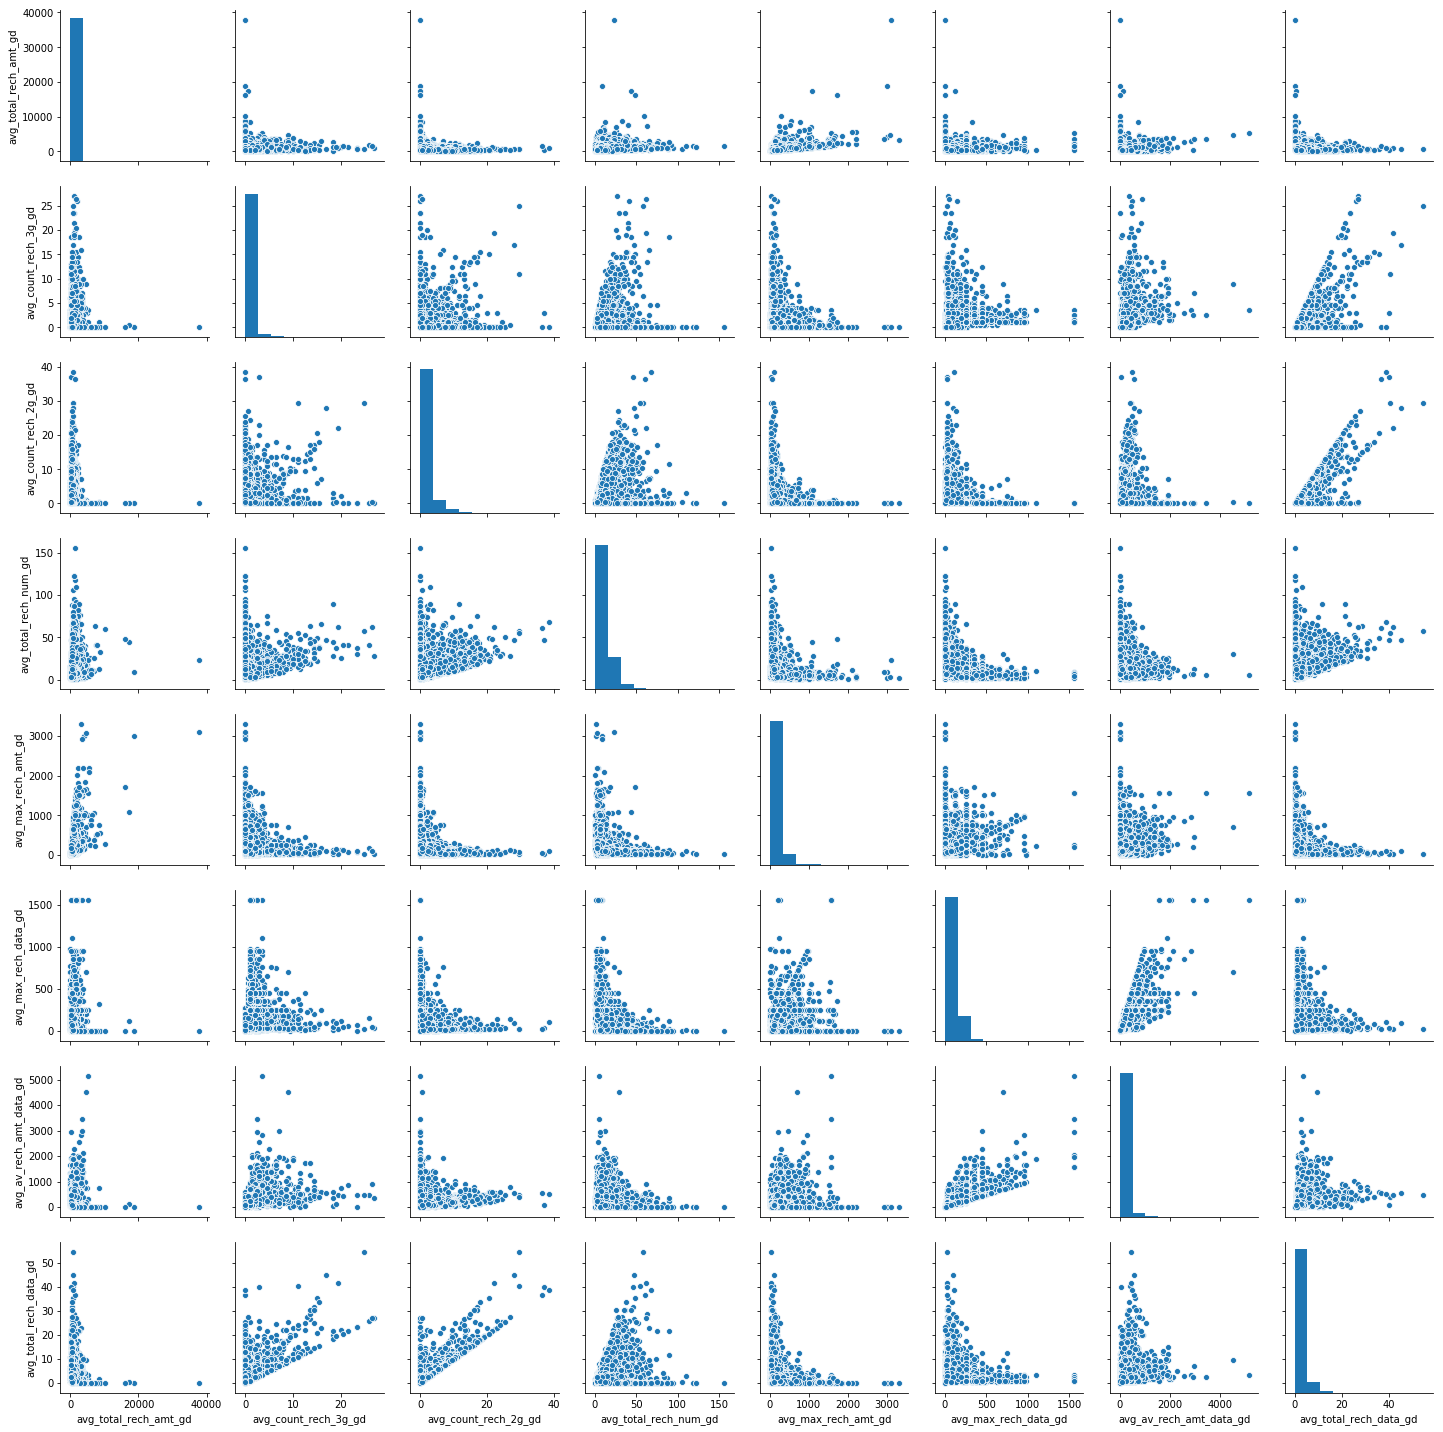

In [92]:
sns.pairplot(df_highvalue_cust[rech_gd_list])

#### Pairplot for recharge parameters of action phase

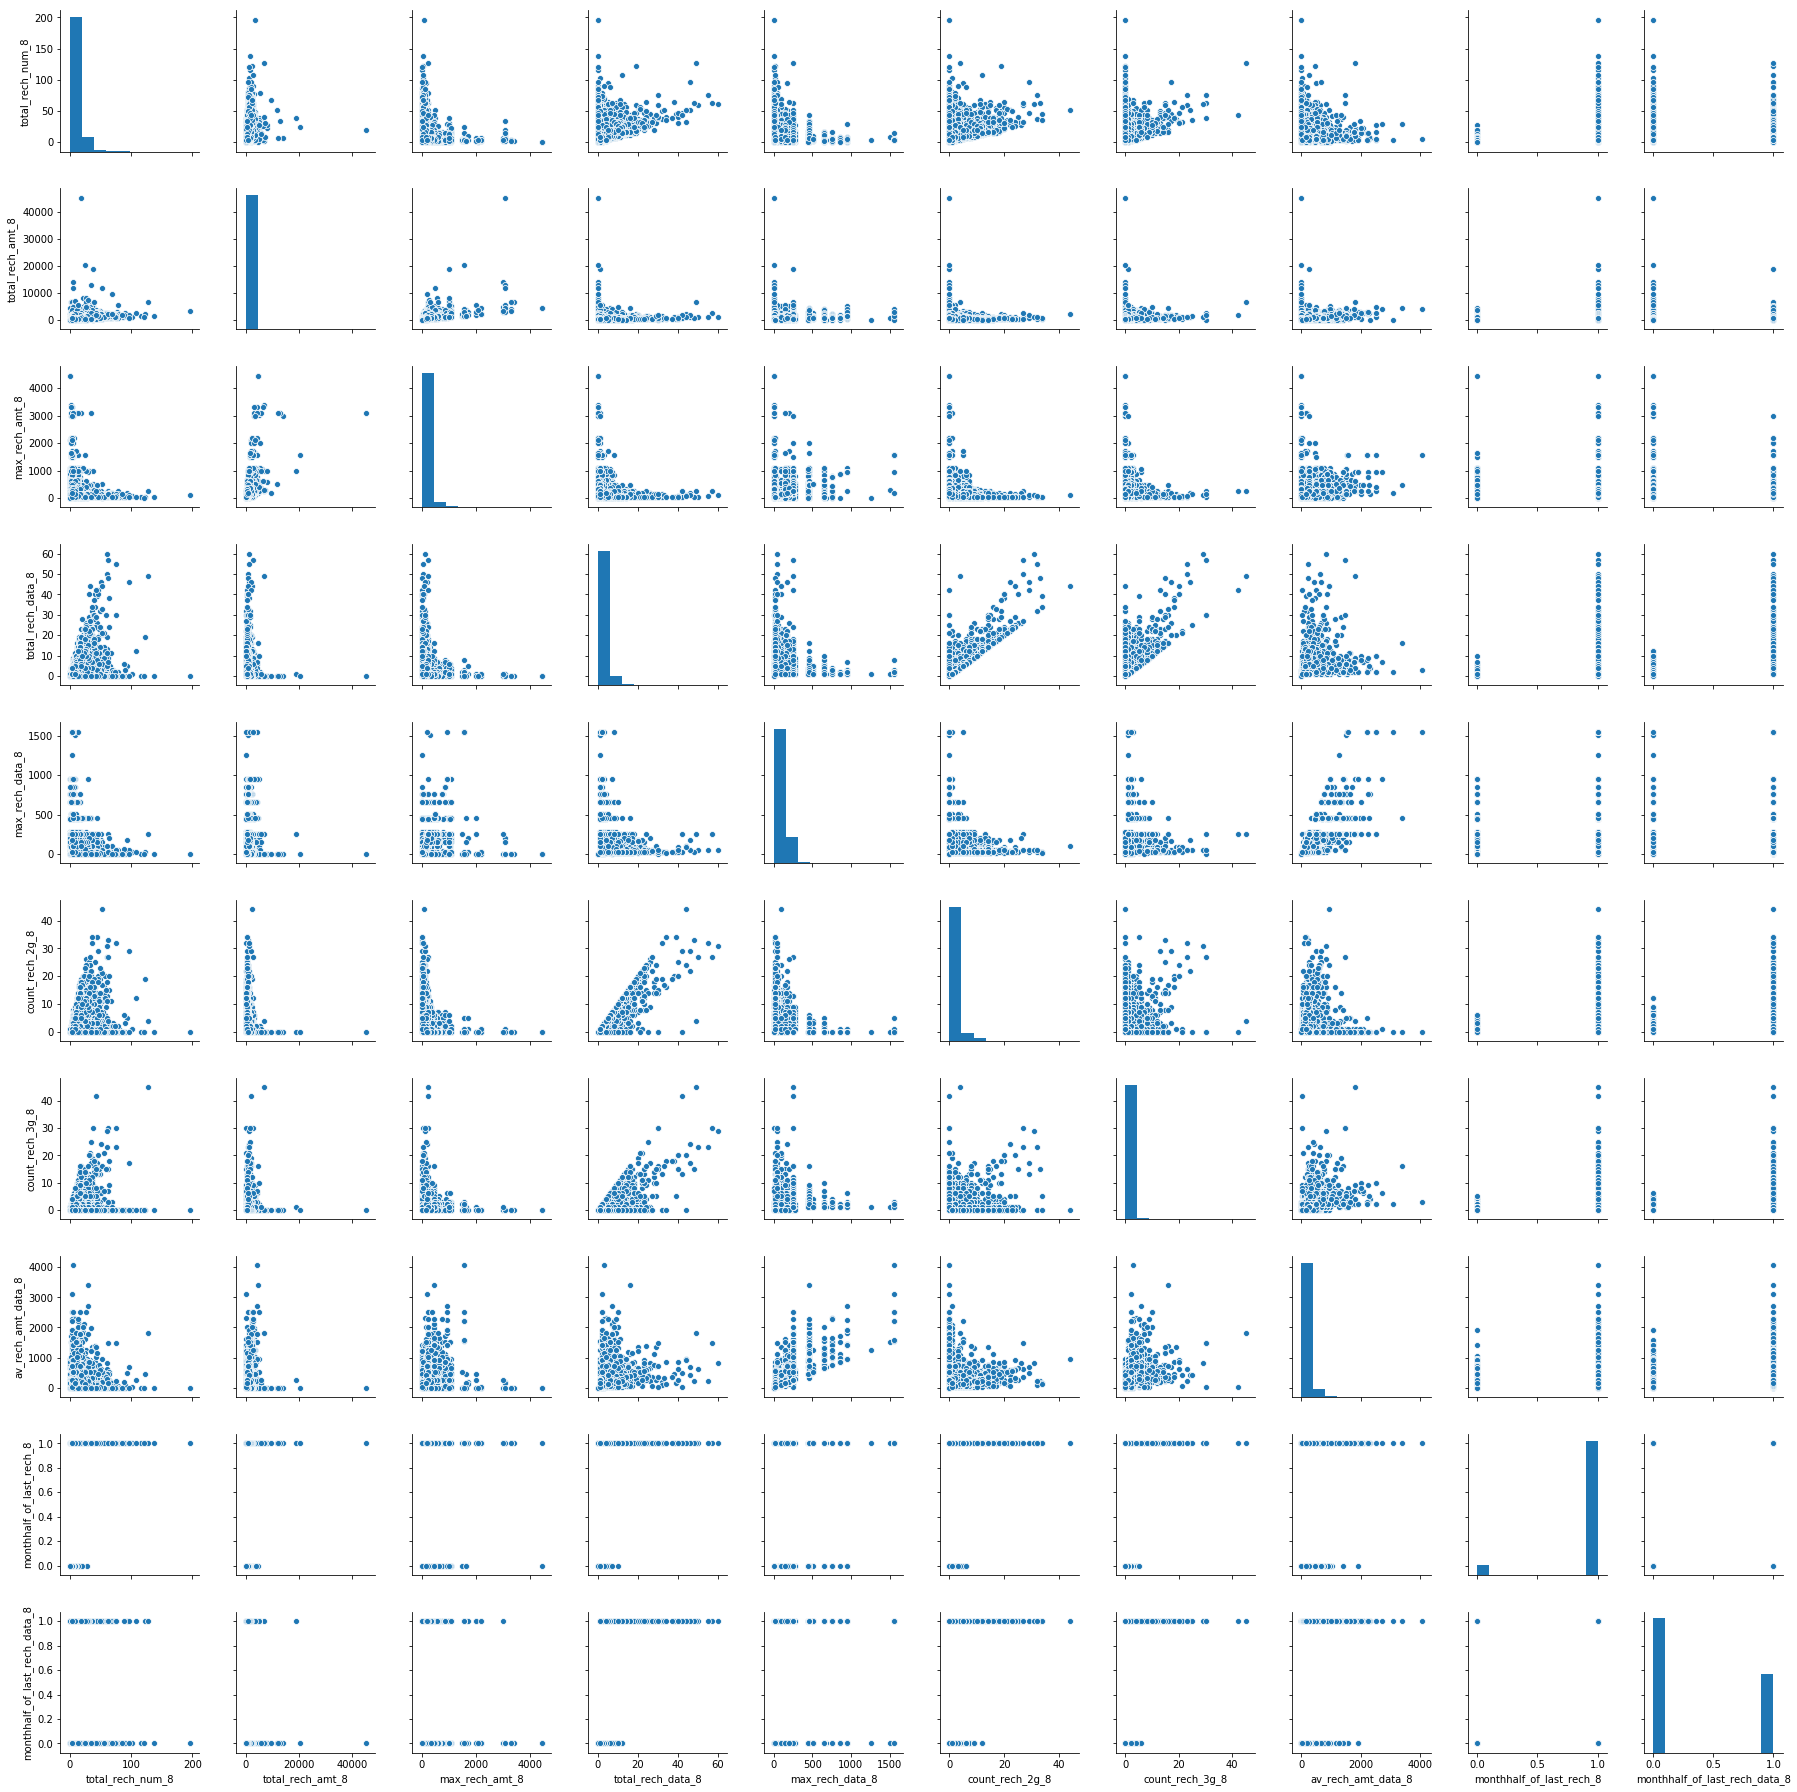

In [93]:
sns.pairplot(df_highvalue_cust[rech_8_list])

### Churn Distribution

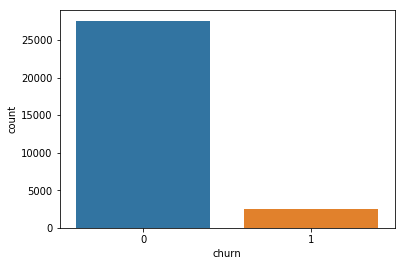

In [94]:
sns.countplot(x='churn',data=df_highvalue_cust)

### Correlation Analysis

In [95]:

# Dropping aon_Range and aon_yrs to reduce redundancy
df_highvalue_cust.drop(['aon_Range','aon_yrs'],axis=1,inplace=True)

#### Top n correlation

In [96]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]



In [97]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(df_highvalue_cust,25))

Top Absolute Correlations
count_rech_2g_8        sachet_2g_8                0.987161
avg_count_rech_2g_gd   avg_sachet_2g_gd           0.987051
avg_total_rech_amt_gd  avg_arpu_gd                0.976752
arpu_8                 total_rech_amt_8           0.955351
avg_arpu_3g_gd         avg_arpu_2g_gd             0.952267
isd_og_mou_8           avg_isd_og_mou_gd          0.950979
arpu_3g_8              arpu_2g_8                  0.937701
avg_count_rech_2g_gd   avg_total_rech_data_gd     0.911180
total_rech_data_8      count_rech_2g_8            0.906664
avg_sachet_2g_gd       avg_total_rech_data_gd     0.905257
total_rech_data_8      sachet_2g_8                0.900629
loc_ic_mou_8           total_ic_mou_8             0.896211
avg_loc_ic_mou_gd      avg_total_ic_mou_gd        0.893996
count_rech_3g_8        sachet_3g_8                0.875291
onnet_mou_8            std_og_t2t_mou_8           0.860668
avg_count_rech_3g_gd   avg_sachet_3g_gd           0.859444
avg_arpu_2g_gd         avg_mon

In [98]:
#Plotting correlation of churn
#plt.figure(figsize=(20,10))
df_highvalue_cust.corr()['churn'].abs().sort_values(ascending = False)#.plot(kind='bar')

churn                            1.000000
monthhalf_of_last_rech_8         0.210487
total_ic_mou_8                   0.178381
monthhalf_of_last_rech_data_8    0.172843
loc_ic_mou_8                     0.172392
total_rech_amt_8                 0.161266
loc_ic_t2m_mou_8                 0.161134
arpu_8                           0.160911
loc_og_mou_8                     0.152593
loc_og_t2m_mou_8                 0.152473
total_rech_num_8                 0.151901
total_og_mou_8                   0.145441
av_rech_amt_data_8               0.137462
max_rech_data_8                  0.135524
monthhalf_of_last_rech_7         0.130571
max_rech_amt_8                   0.128479
offnet_mou_8                     0.121517
total_rech_data_8                0.119891
last_day_rch_amt_8               0.116259
aon                              0.108276
count_rech_2g_8                  0.107392
monthhalf_of_last_rech_data_7    0.100303
monthly_2g_8                     0.095684
avg_std_og_mou_gd                0

### HEAT-MAP

In [99]:
rech_gd_list.append('churn')
rech_8_list.append('churn')

#### HEATMAP for Goodphase Recharge attributes and churn

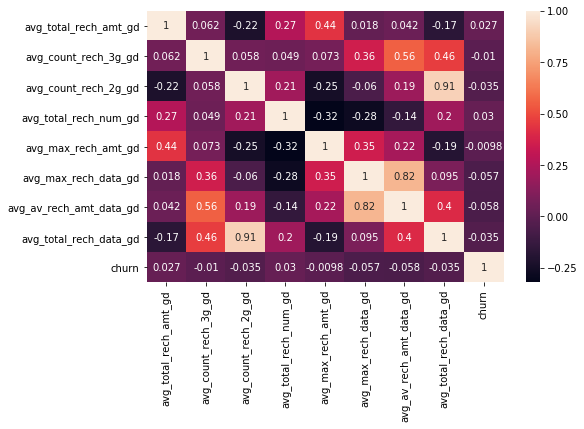

In [100]:
# Let's see the correlation matrix 
plt.figure(figsize = (8,5))        # Size of the figure
sns.heatmap(df_highvalue_cust[rech_gd_list].corr(),annot = True)
plt.show()

### HEATMAP for action phase Recharge attributes and churn

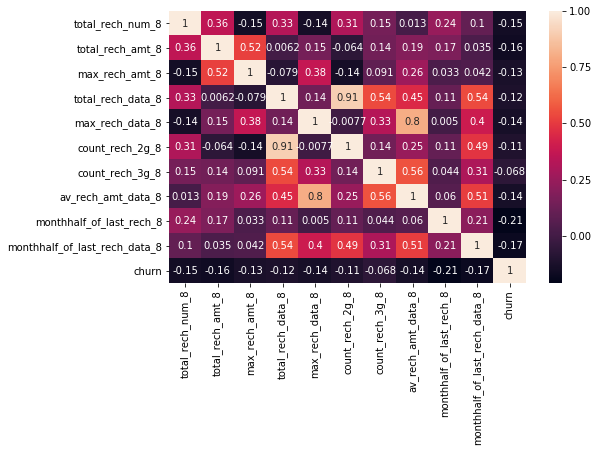

In [101]:
# Let's see the correlation matrix 
plt.figure(figsize = (8,5))        # Size of the figure
sns.heatmap(df_highvalue_cust[rech_8_list].corr(),annot = True)
plt.show()

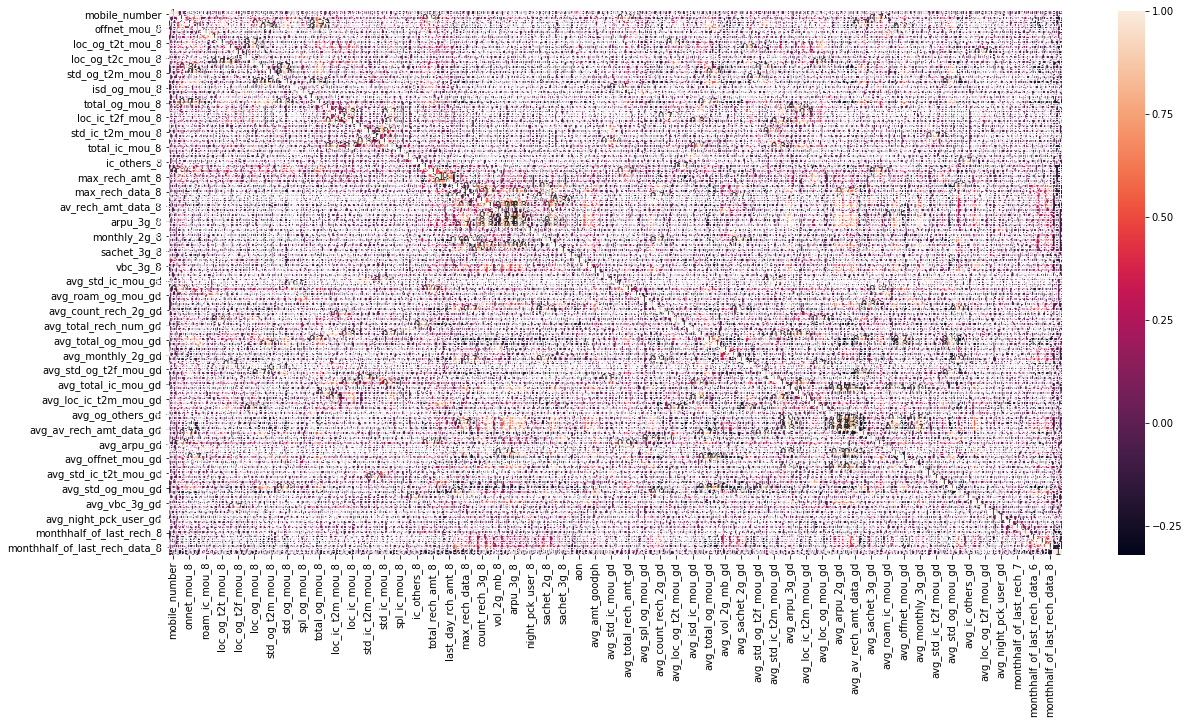

In [102]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df_highvalue_cust.corr(),annot = True)
plt.show()

In [103]:
df_highvalue_cust.shape

(30001, 110)

## STEP 4 : DATA PREPARATION

In [104]:
# creating backup  of the df_highvalue_cust dataframe before modelling
hv_users_imb = df_highvalue_cust.copy()
hv_users_balanced=df_highvalue_cust.copy()
# removing the columns not required for modeling

hv_users_imb.drop(['mobile_number'], axis=1, inplace=True)
hv_users_balanced.drop(['mobile_number'], axis=1, inplace=True)

In [105]:
hv_users_imb.shape

(30001, 109)

### TRAIN-TEST SPLITTING

In [106]:

from sklearn.model_selection import train_test_split

#putting features variables in X
X = hv_users_imb.drop(['churn'], axis=1)

#putting response variables in Y
y = hv_users_imb['churn']    


In [107]:
# split into train and test in a 70:30 ratio 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3,
                                                    random_state=100)

In [108]:
X_train.shape

(21000, 108)

In [109]:
X_test.shape

(9001, 108)

In [110]:
y_train.shape

(21000,)

In [111]:
y_test.shape

(9001,)

In [112]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))
print("Before OverSampling, churn event rate : {}% \n".format(round(sum(y_train==1)/len(y_train)*100,2)))

Before OverSampling, counts of label '1': 1691
Before OverSampling, counts of label '0': 19309 

Before OverSampling, churn event rate : 8.05% 



####  Data is Imbalanced with a churn rate of 8%

### HANDLING DATA-IMBALANCE with RESAMPLING

 Resampling for minority ie. churn customers

In [113]:
from sklearn.utils import resample

In [114]:
churn_cust = hv_users_balanced[hv_users_balanced.churn==1]
nochurn_cust = hv_users_balanced[hv_users_balanced.churn==0]

# upsample minority
churn_cust_upsampled = resample(churn_cust,
                          replace=True, # sample with replacement
                          n_samples=len(nochurn_cust), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([nochurn_cust, churn_cust_upsampled])

#### Lets check the imbalance and balanced dataset

In [115]:
churn_cust.shape

(2441, 109)

In [116]:
nochurn_cust.shape

(27560, 109)

In [117]:
upsampled.shape

(55120, 109)

#### TRAIN-TEST SPLIT ON THE BALANCED DATAFARME

In [118]:
Xup = upsampled.drop(['churn'], axis=1)

#putting response variables in Y
yup = upsampled['churn']   

In [119]:
X_train_up, X_test_up, y_train_up, y_test_up = train_test_split(Xup, yup, 
                                                    train_size=0.7,
                                                    test_size = 0.3,
                                                    random_state=100)

In [120]:
X_train_up.shape

(38584, 108)

In [121]:
X_test_up.shape

(16536, 108)

In [122]:
y_train_up.shape

(38584,)

In [123]:
y_test_up.shape

(16536,)

##### AFTER RESAMPLING

In [124]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_up.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_up.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_up==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_up==0)))
print("After OverSampling, churn event rate : {}% \n".format(round(sum(y_train_up==1)/len(y_train_up)*100,2)))

After OverSampling, the shape of train_X: (38584, 108)
After OverSampling, the shape of train_y: (38584,) 

After OverSampling, counts of label '1': 19278
After OverSampling, counts of label '0': 19306
After OverSampling, churn event rate : 49.96% 



### After Resampling the churn rate increased to around 50%


### FEATURE SCALING

In [125]:
#Rescaling the features before PCA as it is sensitive to the scales of the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [126]:
#Fit and transform on train data
X_train_up= scaler.fit_transform(X_train_up)

C:\Users\SHARIE R NATH\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [127]:
# transform only on test data
X_test_up= scaler.transform(X_test_up)

## STEP 5 : MODEL BUILDING AND EVALUATION

In [128]:
## Importing necessary Libraries
import sklearn.preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#### Function to draw ROC curve

In [129]:

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

#### Function to predict the churn probability

In [130]:
def predictChurnWithProb(model,X,y,prob):
    # Funtion to predict the churn using the input probability cut-off
    # Input arguments: model instance, x and y to predict using model and cut-off probability
    
    # predict
    pred_probs = model.predict_proba(X)[:,1]
    
    y_df= pd.DataFrame({'churn':y, 'churn_Prob':pred_probs})
    # Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
    y_df['final_predicted'] = y_df.churn_Prob.map( lambda x: 1 if x > prob else 0)
    # Let's see the head
    getModelMetrics(y_df.churn,y_df.final_predicted)
    return y_df

#### Function to fit the classification model

In [131]:
def modelfit(alg, X_train, y_train, performCV=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(X_train, y_train)
        
    #Predict training set:
    dtrain_predictions = alg.predict(X_train)
    dtrain_predprob = alg.predict_proba(X_train)[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_val_score(alg, X_train, y_train, cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.roc_auc_score(y_train, dtrain_predictions))
    print ("Recall/Sensitivity : %.4g" % metrics.recall_score(y_train, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, dtrain_predprob))
    
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))

#### Function to get model evaluation metrics

In [132]:
def getModelMetrics(actual_churn=False,pred_churn=False):

    confusion = metrics.confusion_matrix(actual_churn, pred_churn)

    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    print("Roc_auc_score : {}".format(metrics.roc_auc_score(actual_churn,pred_churn)))
    # Let's see the sensitivity of our logistic regression model
    print('Sensitivity/Recall : {}'.format(TP / float(TP+FN)))
    # Let us calculate specificity
    print('Specificity: {}'.format(TN / float(TN+FP)))
    # Calculate false postive rate - predicting churn when customer does not have churned
    print('False Positive Rate: {}'.format(FP/ float(TN+FP)))
    # positive predictive value 
    print('Positive predictive value: {}'.format(TP / float(TP+FP)))
    # Negative predictive value
    print('Negative Predictive value: {}'.format(TN / float(TN+ FN)))
    print("***SKLEARN METRICS***")
    # sklearn accuracy score value 
    print('sklearn accuracy score value: {}'.format(metrics.accuracy_score(actual_churn, pred_churn )))
    # sklearn recall score value 
    print('sklearn recall score value: {}'.format(metrics.recall_score(actual_churn, pred_churn )))
    # sklearn precision score value 
    print('sklearn precision score value: {}'.format(metrics.precision_score(actual_churn, pred_churn )))
    # sklearn F1 score value 
    print('sklearn F1 score value: {}'.format(metrics.f1_score(actual_churn, pred_churn )))

In [133]:
df_highvalue_cust.shape

(30001, 110)

###  Applying PCA 

In [134]:

#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [135]:
#Doing the PCA on the train data
pca.fit(X_train_up)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [136]:
pca.explained_variance_ratio_[:50]

array([0.33868675, 0.1464733 , 0.10173014, 0.09241502, 0.05512488,
       0.0413764 , 0.03992691, 0.03522284, 0.01899005, 0.01488366,
       0.01379035, 0.01252903, 0.01088364, 0.01010803, 0.00676985,
       0.00624457, 0.00496059, 0.00432522, 0.00367648, 0.00333652,
       0.00316012, 0.00274202, 0.00237911, 0.00222176, 0.00199256,
       0.00190947, 0.0017509 , 0.00173069, 0.00157714, 0.00141004,
       0.00123733, 0.00099209, 0.00095704, 0.00094926, 0.00089723,
       0.00086843, 0.00083265, 0.000797  , 0.00076366, 0.00057705,
       0.00053271, 0.00052597, 0.00050791, 0.0004837 , 0.00044982,
       0.00044482, 0.00040403, 0.00038552, 0.00037005, 0.00034396])

### SCREE PLOT- plotting the cumulative variance against the number of components

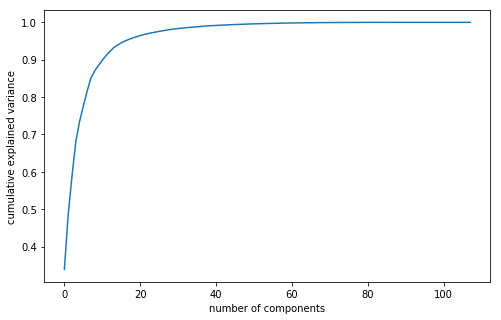

In [137]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

##### From the plot optimal number of components as 25

###  Using incremental PCA for efficiency 

In [138]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=25)

In [139]:
X_train_pca = pca_final.fit_transform(X_train_up)
X_train_pca.shape

(38584, 25)

In [140]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(X_train_pca.transpose())
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)

max corr: 0.004239077049377119 , min corr:  -0.0029545202177114695


### We see that correlations are indeed very close to 0

In [141]:
#Applying selected components to the test data - 25 components
X_test_pca = pca_final.transform(X_test_up)
X_test_pca.shape

(16536, 25)

### Running Logistic Regression Model on Incremental PCA fit data

In [142]:

#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr0 = LogisticRegression(class_weight='balanced')

In [143]:
#Run the model
modelfit(lr0, X_train_pca, y_train_up)


Model Report
Accuracy : 0.8218
Recall/Sensitivity : 0.834
AUC Score (Train): 0.885537
CV Score : Mean - 0.8850361 | Std - 0.003109649 | Min - 0.8805893 | Max - 0.8884427


In [144]:
# predictions on Test data
pred_probs_test = lr0.predict(X_test_pca)
getModelMetrics(y_test_up,pred_probs_test)

Roc_auc_score : 0.8238914933826146
Sensitivity/Recall : 0.8285438299927553
Specificity: 0.8192391567724739
False Positive Rate: 0.18076084322752606
Positive predictive value: 0.8214029207565238
Negative Predictive value: 0.8264483011488634
***SKLEARN METRICS***
sklearn accuracy score value: 0.8238993710691824
sklearn recall score value: 0.8285438299927553
sklearn precision score value: 0.8214029207565238
sklearn F1 score value: 0.8249579225775426


In [145]:

print("Accuracy : {}".format(metrics.accuracy_score(y_test_up,pred_probs_test)))
print("Recall : {}".format(metrics.recall_score(y_test_up,pred_probs_test)))
print("Precision : {}".format(metrics.precision_score(y_test_up,pred_probs_test)))
print("F1 SCORE : {}".format(metrics.f1_score(y_test_up,pred_probs_test)))

Accuracy : 0.8238993710691824
Recall : 0.8285438299927553
Precision : 0.8214029207565238
F1 SCORE : 0.8249579225775426


In [146]:
#Making prediction on the test data
pred_probs_train = lr0.predict_proba(X_train_pca)[:,1]
print("roc_auc_score(Train) {:2.2}".format(metrics.roc_auc_score(y_train_up, pred_probs_train)))

roc_auc_score(Train) 0.89


In [147]:

cut_off_prob=0.5
y_train_df = predictChurnWithProb(lr0,X_train_pca,y_train_up,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.8218002749135
Sensitivity/Recall : 0.8340076771449321
Specificity: 0.8095928726820677
False Positive Rate: 0.19040712731793225
Positive predictive value: 0.8139111066113193
Negative Predictive value: 0.8300584174190122
***SKLEARN METRICS***
sklearn accuracy score value: 0.8217914161310388
sklearn recall score value: 0.8340076771449321
sklearn precision score value: 0.8139111066113193
sklearn F1 score value: 0.8238368518138963


,churn,churn_Prob,final_predicted
11310,1,0.924951,1
16660,1,0.933313,1
6306,0,0.150416,0
16184,0,0.602858,1
22163,0,0.048263,0


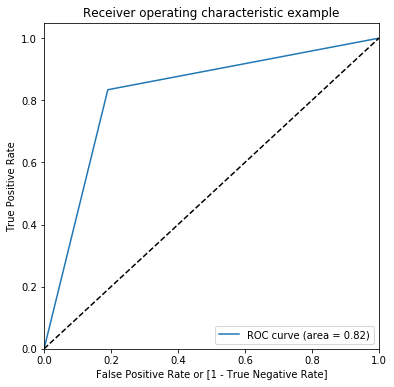

(array([0.        , 0.19040713, 1.        ]),
 array([0.        , 0.83400768, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [148]:
draw_roc(y_train_df.churn, y_train_df.final_predicted)

In [149]:
#draw_roc(y_pred_final.Churn, y_pred_final.predicted)
print("roc_auc_score : {:2.2f}".format(metrics.roc_auc_score(y_train_df.churn, y_train_df.final_predicted)))

roc_auc_score : 0.82


### Finding optimal cut off  from accuracy, sensitivity, specificity curve

In [150]:
def findOptimalCutoff(df):
    #Function to find the optimal cutoff for classifing as churn/non-churn
    # Let's create columns with different probability cutoffs 
    numbers = [float(x)/10 for x in range(10)]
    for i in numbers:
        df[i] = df.churn_Prob.map( lambda x: 1 if x > i else 0)
    #print(df.head())
    
    # Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
    cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
    from sklearn.metrics import confusion_matrix
    
    # TP = confusion[1,1] # true positive 
    # TN = confusion[0,0] # true negatives
    # FP = confusion[0,1] # false positives
    # FN = confusion[1,0] # false negatives
    
    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        cm1 = metrics.confusion_matrix(df.churn, df[i] )
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1
        
        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    print(cutoff_df)
    # Let's plot accuracy sensitivity and specificity for various probabilities.
    cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
    plt.show()

     prob  accuracy     sensi     speci
0.0   0.0  0.499637  1.000000  0.000000
0.1   0.1  0.631065  0.974531  0.288097
0.2   0.2  0.713301  0.945274  0.481664
0.3   0.3  0.766017  0.909638  0.622604
0.4   0.4  0.800435  0.873794  0.727183
0.5   0.5  0.821791  0.834008  0.809593
0.6   0.6  0.822077  0.770671  0.873407
0.7   0.7  0.797921  0.676730  0.918937
0.8   0.8  0.721905  0.486669  0.956801
0.9   0.9  0.610797  0.233167  0.987879


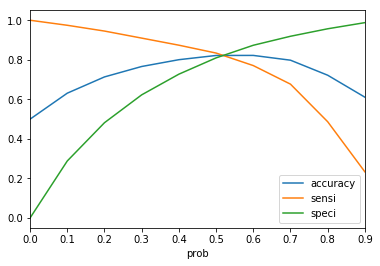

In [151]:

# finding cut-off with the right balance of the metrices
# sensitivity vs specificity trade-off
findOptimalCutoff(y_train_df)

#### From the graph  and accuracy-sensitivity -specificity values optimal cut-off could be determined as 0.5

In [152]:
# predicting with the choosen cut-off on train
cut_off_prob = 0.5
y_train_pred=predictChurnWithProb(lr0,X_train_pca,y_train_up,cut_off_prob)
y_train_pred.head()

Roc_auc_score : 0.8218002749135
Sensitivity/Recall : 0.8340076771449321
Specificity: 0.8095928726820677
False Positive Rate: 0.19040712731793225
Positive predictive value: 0.8139111066113193
Negative Predictive value: 0.8300584174190122
***SKLEARN METRICS***
sklearn accuracy score value: 0.8217914161310388
sklearn recall score value: 0.8340076771449321
sklearn precision score value: 0.8139111066113193
sklearn F1 score value: 0.8238368518138963


,churn,churn_Prob,final_predicted
11310,1,0.924951,1
16660,1,0.933313,1
6306,0,0.150416,0
16184,0,0.602858,1
22163,0,0.048263,0


In [153]:
# predicting with the choosen cut-off on test
y_test_pred=predictChurnWithProb(lr0,X_test_pca,y_test_up,cut_off_prob)
y_test_pred.head()

Roc_auc_score : 0.8238914933826146
Sensitivity/Recall : 0.8285438299927553
Specificity: 0.8192391567724739
False Positive Rate: 0.18076084322752606
Positive predictive value: 0.8214029207565238
Negative Predictive value: 0.8264483011488634
***SKLEARN METRICS***
sklearn accuracy score value: 0.8238993710691824
sklearn recall score value: 0.8285438299927553
sklearn precision score value: 0.8214029207565238
sklearn F1 score value: 0.8249579225775426


,churn,churn_Prob,final_predicted
24137,0,0.083664,0
14909,1,0.831249,1
22520,1,0.738466,1
19640,1,0.743523,1
15126,1,0.649650,1


### Decision Tree 

#### with default hyperparameters

In [154]:
dt0 = DecisionTreeClassifier(class_weight='balanced',
                             max_features='auto',
                             min_samples_split=100,
                             min_samples_leaf=100,
                             max_depth=6,
                             random_state=10)
modelfit(dt0, X_train_up, y_train_up)


Model Report
Accuracy : 0.8205
Recall/Sensitivity : 0.8004
AUC Score (Train): 0.893443
CV Score : Mean - 0.900261 | Std - 0.008359154 | Min - 0.8871915 | Max - 0.9112988


In [155]:
# make predictions
pred_probs_test = dt0.predict(X_test_up)
#Let's check the model metrices.
getModelMetrics(actual_churn=y_test_up,pred_churn=pred_probs_test)

Roc_auc_score : 0.8201243137250542
Sensitivity/Recall : 0.7995653223858972
Specificity: 0.8406833050642113
False Positive Rate: 0.1593166949357887
Positive predictive value: 0.8343202721431271
Negative Predictive value: 0.8069542970112804
***SKLEARN METRICS***
sklearn accuracy score value: 0.8200895016932753
sklearn recall score value: 0.7995653223858972
sklearn precision score value: 0.8343202721431271
sklearn F1 score value: 0.816573154941735


### HYPER PARAMETER TUNING- GRID SEARCH

In [156]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': range(5,15,3),
    'min_samples_leaf': range(100, 400, 50),
    'min_samples_split': range(100, 400, 100),
    'max_features': [8,10,15]
}
# Create a based model
dt = DecisionTreeClassifier(class_weight='balanced',random_state=10)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, 
                          cv = 3, n_jobs = 4,verbose = 1,scoring="f1_weighted")

In [157]:
# Fit the grid search to the data
grid_search.fit(X_train_up, y_train_up)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    8.4s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   27.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.0min
[Parallel(n_jobs=4)]: Done 648 out of 648 | elapsed:  1.5min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'max_depth': range(5, 15, 3), 'min_samples_leaf': range(100, 400, 50), 'min_samples_split': range(100, 400, 100), 'max_features': [8, 10, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_weighted', verbose=1)

In [158]:
# printing the optimal accuracy score and hyperparameters
print('We can get recall of',grid_search.best_score_,'using',grid_search.best_params_)

We can get recall of 0.8549019525559197 using {'max_depth': 11, 'max_features': 15, 'min_samples_leaf': 100, 'min_samples_split': 100}


### MODEL FIT with optimal hyper parameters

In [159]:
# model with the best hyperparameters
dt_final = DecisionTreeClassifier(class_weight='balanced',
                             max_depth=14,
                             min_samples_leaf=100, 
                             min_samples_split=100,
                             max_features=15,
                             random_state=10)

In [160]:
modelfit(dt_final,X_train_up,y_train_up)


Model Report
Accuracy : 0.8726
Recall/Sensitivity : 0.8727
AUC Score (Train): 0.950791
CV Score : Mean - 0.9363604 | Std - 0.003656907 | Min - 0.9300931 | Max - 0.9404755


In [161]:
# make predictions
pred_probs_test = dt_final.predict(X_test_up)

In [162]:
#Let's check the model metrices.
getModelMetrics(actual_churn=y_test_up,pred_churn=pred_probs_test)

Roc_auc_score : 0.8661086921069845
Sensitivity/Recall : 0.8670610963535378
Specificity: 0.8651562878604313
False Positive Rate: 0.1348437121395687
Positive predictive value: 0.8658066071859175
Negative Predictive value: 0.8664159184663917
***SKLEARN METRICS***
sklearn accuracy score value: 0.8661103047895501
sklearn recall score value: 0.8670610963535378
sklearn precision score value: 0.8658066071859175
sklearn F1 score value: 0.8664333976833977


In [163]:
# predicting churn with default cut-off 0.5
cut_off_prob = 0.5
y_train_df = predictChurnWithProb(dt_final,X_train_up,y_train_up,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.8725638591590047
Sensitivity/Recall : 0.8727046374105197
Specificity: 0.8724230809074899
False Positive Rate: 0.1275769190925101
Positive predictive value: 0.8722974023953959
Negative Predictive value: 0.8728299735710214
***SKLEARN METRICS***
sklearn accuracy score value: 0.8725637569977193
sklearn recall score value: 0.8727046374105197
sklearn precision score value: 0.8722974023953959
sklearn F1 score value: 0.8725009723842863


,churn,churn_Prob,final_predicted
11310,1,0.986414,1
16660,1,0.948347,1
6306,0,0.158730,0
16184,0,0.410608,0
22163,0,0.000000,0


     prob  accuracy     sensi     speci
0.0   0.0  0.681111  1.000000  0.362685
0.1   0.1  0.776773  0.991649  0.562209
0.2   0.2  0.826120  0.971314  0.681135
0.3   0.3  0.850301  0.950980  0.749767
0.4   0.4  0.866888  0.912024  0.821817
0.5   0.5  0.872564  0.872705  0.872423
0.6   0.6  0.870128  0.834734  0.905470
0.7   0.7  0.856054  0.773420  0.938568
0.8   0.8  0.832081  0.702044  0.961929
0.9   0.9  0.782112  0.580195  0.983736


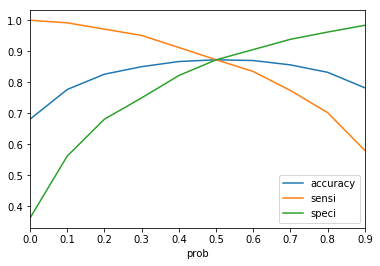

In [164]:
# finding cut-off with the right balance of the metrices
findOptimalCutoff(y_train_df)

In [165]:
# predicting churn with cut-off 0.5
cut_off_prob=0.5
y_train_df = predictChurnWithProb(dt_final,X_train_up,y_train_up,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.8725638591590047
Sensitivity/Recall : 0.8727046374105197
Specificity: 0.8724230809074899
False Positive Rate: 0.1275769190925101
Positive predictive value: 0.8722974023953959
Negative Predictive value: 0.8728299735710214
***SKLEARN METRICS***
sklearn accuracy score value: 0.8725637569977193
sklearn recall score value: 0.8727046374105197
sklearn precision score value: 0.8722974023953959
sklearn F1 score value: 0.8725009723842863


,churn,churn_Prob,final_predicted
11310,1,0.986414,1
16660,1,0.948347,1
6306,0,0.158730,0
16184,0,0.410608,0
22163,0,0.000000,0


In [166]:
#Lets see how it performs on test data.
y_test_df= predictChurnWithProb(dt_final,X_test_up,y_test_up,cut_off_prob)
y_test_df.head()

Roc_auc_score : 0.8661086921069845
Sensitivity/Recall : 0.8670610963535378
Specificity: 0.8651562878604313
False Positive Rate: 0.1348437121395687
Positive predictive value: 0.8658066071859175
Negative Predictive value: 0.8664159184663917
***SKLEARN METRICS***
sklearn accuracy score value: 0.8661103047895501
sklearn recall score value: 0.8670610963535378
sklearn precision score value: 0.8658066071859175
sklearn F1 score value: 0.8664333976833977


,churn,churn_Prob,final_predicted
24137,0,0.000000,0
14909,1,1.000000,1
22520,1,1.000000,1
19640,1,0.903112,1
15126,1,0.964014,1


#### FEATURE IMPORTANCE

In [167]:
X=Xup

features = X.columns.values
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [168]:
importance = dt_final.feature_importances_
# create dataframe
feature_importance_dt = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance_dt = feature_importance_dt[['variables', 'importance_percentage']]

# sort features
feature_importance_dt = feature_importance_dt.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance_dt.importance_percentage.sum())

Sum of importance= 100.0


In [169]:
# Top 10 features
feature_importance_dt[:10]

,variables,importance_percentage
0,total_og_mou_8,45.212458
1,last_day_rch_amt_8,12.389030
2,loc_ic_mou_8,6.590427
3,av_rech_amt_data_8,3.919930
4,max_rech_data_8,3.123533
5,roam_og_mou_8,3.071470
6,loc_og_mou_8,2.683700
7,roam_ic_mou_8,2.343688
8,monthhalf_of_last_rech_data_8,2.177361
9,total_rech_amt_8,1.934082


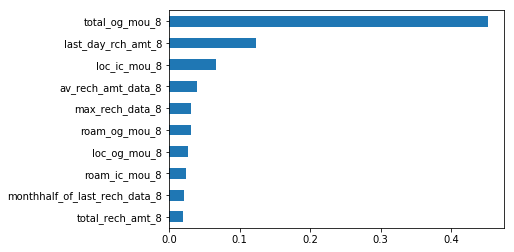

In [170]:
weights = pd.Series(importance,index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

### RANDOM FOREST

###### With default parameters

In [171]:
rf0=RandomForestClassifier(class_weight='balanced',
                             max_depth=15,
                             min_samples_leaf=100, 
                             min_samples_split=100,
                             max_features='auto',
                             random_state=10)
modelfit(rf0, X_train_up, y_train_up)


Model Report
Accuracy : 0.8879
Recall/Sensitivity : 0.873
AUC Score (Train): 0.958843
CV Score : Mean - 0.9493906 | Std - 0.002639812 | Min - 0.9449446 | Max - 0.9518257


In [172]:
# make predictions
pred_probs_test = rf0.predict(X_test_up)
#Let's check the model metrices.
getModelMetrics(actual_churn=y_test_up,pred_churn=pred_probs_test)

Roc_auc_score : 0.8857252997339307
Sensitivity/Recall : 0.8730982854382999
Specificity: 0.8983523140295614
False Positive Rate: 0.10164768597043858
Positive predictive value: 0.8960346964064436
Negative Predictive value: 0.8758563666430428
***SKLEARN METRICS***
sklearn accuracy score value: 0.8857039187227866
sklearn recall score value: 0.8730982854382999
sklearn precision score value: 0.8960346964064436
sklearn F1 score value: 0.884417808219178


### HYPER PARAMETER TUNING- GRID SEARCH

In [173]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': range(5,15,3),
    'min_samples_leaf': range(100, 400, 50),
    'min_samples_split': range(100, 400, 100),
    'max_features': [8,10,15]
}
# Create a based model
rf = RandomForestClassifier(class_weight='balanced',random_state=10)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = 4,verbose = 1,scoring="f1_weighted")

In [174]:
# Fit the grid search to the data
grid_search.fit(X_train_up, y_train_up)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   13.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  2.9min
[Parallel(n_jobs=4)]: Done 648 out of 648 | elapsed:  4.5min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=10, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'max_depth': range(5, 15, 3), 'min_samples_leaf': range(100, 400, 50), 'min_samples_split': range(100, 400, 100), 'max_features': [8, 10, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_weighted', verbose=1)

In [175]:
# printing the optimal accuracy score and hyperparameters
print('We can get recall of',grid_search.best_score_,'using',grid_search.best_params_)

We can get recall of 0.8750634788674911 using {'max_depth': 14, 'max_features': 15, 'min_samples_leaf': 100, 'min_samples_split': 100}


### MODEL FIT with optimal hyper parameters

In [176]:
# model with the best hyperparameters
rf_final = RandomForestClassifier(class_weight='balanced',
                             max_depth=14,
                             min_samples_leaf=100, 
                             min_samples_split=100,
                             max_features=15,
                             random_state=10)

In [177]:
modelfit(rf_final,X_train_up,y_train_up)


Model Report
Accuracy : 0.889
Recall/Sensitivity : 0.8679
AUC Score (Train): 0.961551
CV Score : Mean - 0.9511673 | Std - 0.001900539 | Min - 0.9485063 | Max - 0.9541171


In [178]:
# make predictions
pred_probs_test = rf_final.predict(X_test_up)
#Let's check the model metrices.
getModelMetrics(actual_churn=y_test_up,pred_churn=pred_probs_test)

Roc_auc_score : 0.8879772868278334
Sensitivity/Recall : 0.8668196087901473
Specificity: 0.9091349648655197
False Positive Rate: 0.09086503513448026
Positive predictive value: 0.9054105183503595
Negative Predictive value: 0.8718484954107122
***SKLEARN METRICS***
sklearn accuracy score value: 0.8879414610546686
sklearn recall score value: 0.8668196087901473
sklearn precision score value: 0.9054105183503595
sklearn F1 score value: 0.8856948985256924


In [179]:
# predicting churn with default cut-off 0.5
cut_off_prob = 0.5
y_train_df = predictChurnWithProb(rf_final,X_train_up,y_train_up,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.8889801643537656
Sensitivity/Recall : 0.8679323581284366
Specificity: 0.9100279705790946
False Positive Rate: 0.08997202942090542
Positive predictive value: 0.9059505116682007
Negative Predictive value: 0.8734277902063137
***SKLEARN METRICS***
sklearn accuracy score value: 0.8889954385237404
sklearn recall score value: 0.8679323581284366
sklearn precision score value: 0.9059505116682007
sklearn F1 score value: 0.886534029194373


,churn,churn_Prob,final_predicted
11310,1,0.972920,1
16660,1,0.977948,1
6306,0,0.129665,0
16184,0,0.447751,0
22163,0,0.032514,0


     prob  accuracy     sensi     speci
0.0   0.0  0.500959  1.000000  0.002642
0.1   0.1  0.690260  1.000000  0.380970
0.2   0.2  0.824305  0.992790  0.656065
0.3   0.3  0.875441  0.962704  0.788304
0.4   0.4  0.892131  0.919961  0.864343
0.5   0.5  0.888995  0.867932  0.910028
0.6   0.6  0.871579  0.802521  0.940537
0.7   0.7  0.837031  0.710707  0.963172
0.8   0.8  0.793956  0.609399  0.978245
0.9   0.9  0.747771  0.507781  0.987413


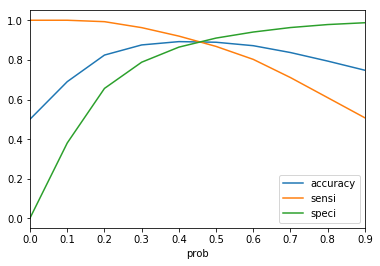

In [180]:
# finding cut-off with the right balance of the metrices
findOptimalCutoff(y_train_df)

In [181]:
# predicting churn with cut-off 0.5
cut_off_prob=0.5
y_train_df = predictChurnWithProb(rf_final,X_train_up,y_train_up,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.8889801643537656
Sensitivity/Recall : 0.8679323581284366
Specificity: 0.9100279705790946
False Positive Rate: 0.08997202942090542
Positive predictive value: 0.9059505116682007
Negative Predictive value: 0.8734277902063137
***SKLEARN METRICS***
sklearn accuracy score value: 0.8889954385237404
sklearn recall score value: 0.8679323581284366
sklearn precision score value: 0.9059505116682007
sklearn F1 score value: 0.886534029194373


,churn,churn_Prob,final_predicted
11310,1,0.972920,1
16660,1,0.977948,1
6306,0,0.129665,0
16184,0,0.447751,0
22163,0,0.032514,0


In [182]:
#Lets see how it performs on test data.
y_test_df= predictChurnWithProb(rf_final,X_test_up,y_test_up,cut_off_prob)
y_test_df.head()

Roc_auc_score : 0.8879772868278334
Sensitivity/Recall : 0.8668196087901473
Specificity: 0.9091349648655197
False Positive Rate: 0.09086503513448026
Positive predictive value: 0.9054105183503595
Negative Predictive value: 0.8718484954107122
***SKLEARN METRICS***
sklearn accuracy score value: 0.8879414610546686
sklearn recall score value: 0.8668196087901473
sklearn precision score value: 0.9054105183503595
sklearn F1 score value: 0.8856948985256924


,churn,churn_Prob,final_predicted
24137,0,0.079379,0
14909,1,0.992780,1
22520,1,0.942946,1
19640,1,0.941990,1
15126,1,0.673370,1


#### FEATURE IMPORTANCE

In [183]:
X=Xup

features = X.columns.values
X = pd.DataFrame(scaler.transform(X))
X.columns = features


In [184]:
importance_rf = rf_final.feature_importances_
# create dataframe
feature_importance_rf = pd.DataFrame({'variables': features, 'importance_percentage': importance_rf*100})
feature_importance_rf = feature_importance_rf[['variables', 'importance_percentage']]

# sort features
feature_importance_rf = feature_importance_rf.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance_rf.importance_percentage.sum())


Sum of importance= 100.0


In [185]:
# Top 10 features
feature_importance_rf[:10]

,variables,importance_percentage
0,total_ic_mou_8,12.825546
1,loc_ic_mou_8,12.323813
2,roam_og_mou_8,6.383118
3,loc_og_t2m_mou_8,6.253471
4,total_og_mou_8,6.032411
5,loc_ic_t2m_mou_8,4.967104
6,max_rech_amt_8,4.095054
7,last_day_rch_amt_8,4.069444
8,std_ic_mou_8,4.016458
9,av_rech_amt_data_8,3.250600


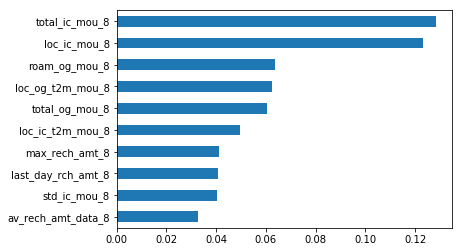

In [186]:
#importances
weights = pd.Series(importance_rf,index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

## STEP 6 : INSIGHTS

### Final Choice of Model

### Business Insights